In [2]:
from pathlib import Path
import pandas as pd
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [3]:
DATAFOLDER = Path("../data")
FIGSFOLDER = Path("../figures")

In [4]:
df = pd.read_csv(DATAFOLDER / 'fig_5_ghrelin.csv')

print(df.head())

       ID   sex group   condition  ghrelin_pg_per_ml
0  MPX322  male   IPR  dark_onset            516.070
1  MPX327  male   IPR  dark_onset            481.401
2  MPX328  male   IPR  dark_onset            297.777
3  MPX333  male   IPR  dark_onset            733.612
4  MPX334  male   IPR  dark_onset            258.308


In [8]:

# Initialize a dictionary to store the lists
group_condition_lists = {}

# Group by 'group' and 'condition'
grouped = df.groupby(['group', 'condition'])

# Loop through each group and condition, storing the list of values in the dictionary
for (group, condition), group_df in grouped:
    group_condition_lists[(group, condition)] = group_df['ghrelin_pg_per_ml'].tolist()

#removing value for MPX325, NR dark_onset
outlier_value = 1173.375
ipr_dark_onset_list = group_condition_lists[('NR', 'dark_onset')]

if outlier_value in ipr_dark_onset_list:
    ipr_dark_onset_list.remove(outlier_value)
    
# Print the dictionary for verification
for key, value in group_condition_lists.items():
    print(f"{key}: {value}")


('IPR', 'dark_onset'): [516.07, 481.401, 297.777, 733.612, 258.308, 547.135, 455.29699999999997]
('IPR', 'light_onset'): [362.542, 831.4730000000001, 335.73199999999997, 276.45799999999997, 403.296, 776.362, 372.79900000000004]
('NR', 'dark_onset'): [193.333, 493.541, 360.884, 285.399, 272.857, 452.19699999999995]
('NR', 'light_onset'): [160.429, 222.701, 151.89, 334.036, 441.29699999999997, 130.735, 277.466]
('PR', 'dark_onset'): [296.019, 322.087, 495.05199999999996, 1113.934, 631.826, 535.363, 775.0360000000001]
('PR', 'light_onset'): [535.363, 458.39099999999996, 796.169, 529.4490000000001, 684.6419999999999, 433.463, 464.897]


In [6]:
colors = {'NR': ["#FF7F0E", "#ffb370"],
          'PR': ["#9467BD", "#c4abdb"],
          'IPR': ["#17BECF", "#90eaf3"]}

group_labels = ["NR", "PR", "IPR"]
scattersize=50


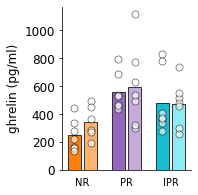

In [10]:
#ghrelin

f,ax=plt.subplots(figsize=(3,3), ncols=1, gridspec_kw={"left": 0.3})

tp.barscatter(
        [[group_condition_lists[('NR', 'light_onset')], group_condition_lists[('NR', 'dark_onset')]], 
         [group_condition_lists[('PR', 'light_onset')], group_condition_lists[('PR', 'dark_onset')]],
         [group_condition_lists[('IPR', 'light_onset')], group_condition_lists[('IPR', 'dark_onset')]]],
        barfacecolor_option='individual',
        barfacecolor=[color for group in group_labels for color in colors[group]],
        scattersize=scattersize,
        grouplabel=group_labels,
        scatteralpha=0.6,
        ax=ax)


ax.set_ylabel("ghrelin (pg/ml)", fontsize = 12)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis='y', labelsize=12)
    
f.savefig(FIGSFOLDER / "ghrelin.pdf")    